## Metis ML Classification Project Feature Engineering

Chaya Wurman

Goal: Given the CDC NHANES (National Health and Nutrition Examination Survey) data,
can we predict if a patient has had a stroke. Strokes are caused by many medical and
lifestyle factors, and knowing which factors are highly correlated with strokes can
help better predict those who are at higher risk and help mitigate the risk before
a potential life-threatening event happens.

This document will do some of the initial feature engineering necessary to prepare our
data for modeling.

In [5]:
# Import all our necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load all the data
data = pd.read_csv("final_data.csv")
print(len(data))

9813


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'high_blood_pressure_diagnosed'}>,
        <AxesSubplot:title={'center':'high_blood_pressure_prescribed_medicine'}>,
        <AxesSubplot:title={'center':'high_blood_cholesterol'}>],
       [<AxesSubplot:title={'center':'overweight_diagnosed'}>,
        <AxesSubplot:title={'center':'coronary_heart_disease'}>,
        <AxesSubplot:title={'center':'LABEL_had_stroke'}>,
        <AxesSubplot:title={'center':'physical_activity_vigorous_time_per_day'}>,
        <AxesSubplot:title={'center':'physical_activity_moderate_time_per_day'}>,
        <AxesSubplot:title={'center':'physical_activity_vigorous_days_per_week'}>],
       [<AxesSubplot:title={'center':'physical_activity_moderate_days_per_week'}>,
        <AxesSubplot:title={'center':'physical_activity_recreational_vigorous_days_per_week'}>,
        <AxesSu

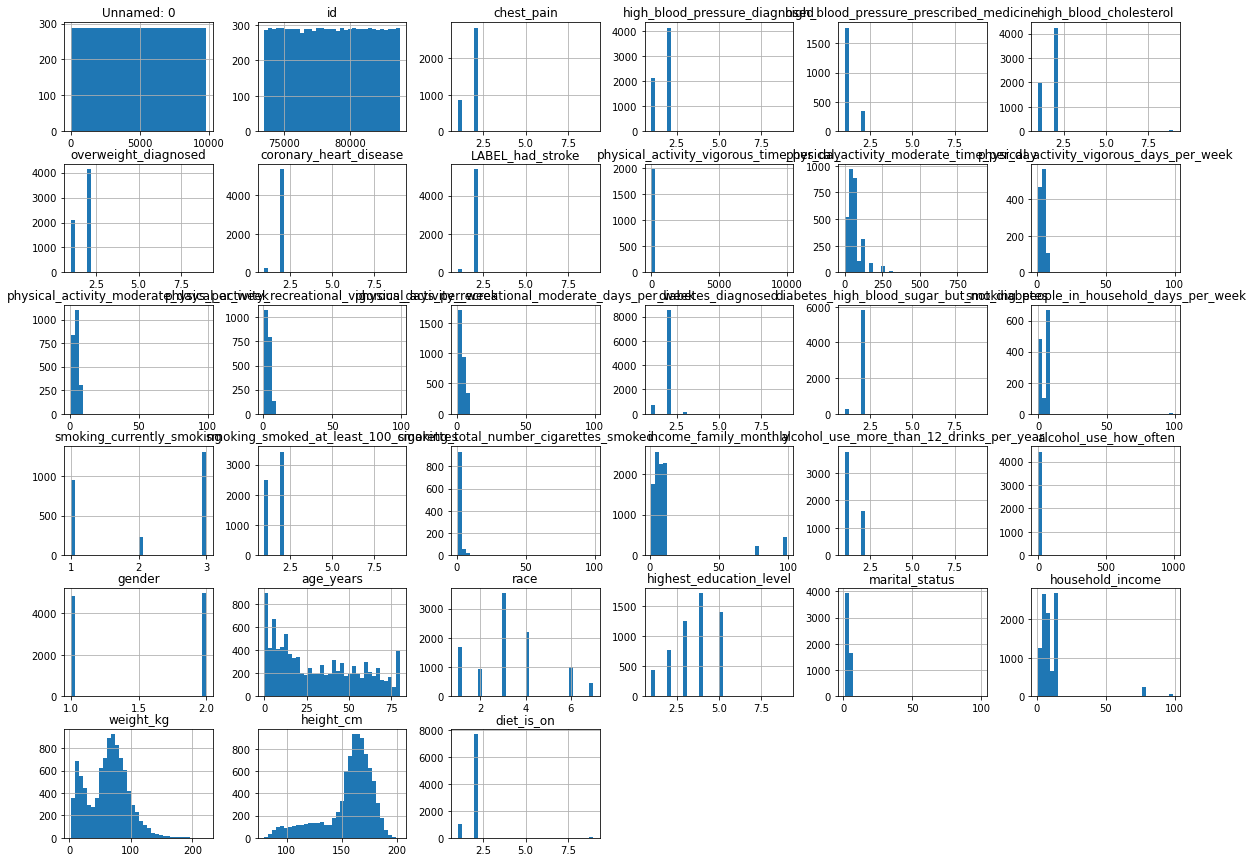

In [3]:
# Some data exploration
# For each of our columns, lets go through and look at the distribution of data
data.hist(bins=34, figsize=(20, 15))

# seaborn pairplot

# import seaborn as sns
# subplots = data[["chest_pain", "high_blood_pressure_diagnosed", "overweight_diagnosed", "coronary_heart_disease", "LABEL_had_stroke"]]
# sns.pairplot(subplots, hue="LABEL_had_stroke")

In [7]:
# Some data cleaning, using context from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2013-2014

# We dont need the ID columns anymore, which are the first two
data = data.iloc[: , 2:]
# data.drop(["Unnamed: 0", "id"])

# Remove all data where we don't have a 1 or 2 for stroke
data = data[data.LABEL_had_stroke.isin([1, 2])]

# Also re-label the data so that:
# 0 - does not have stroke
# 1 - has had stroke
data.LABEL_had_stroke = data.LABEL_had_stroke.replace(2, 0)

def replace_unknown_with_nan(column):
    # For many columns, 7 and 9 represent invalid data
    # 7 - refused, 9 - don't know
    # Let's replace with NaNs since that's effectively how we'll interpret it
    data[column] = data[column].replace(7.0, np.NAN)
    data[column] = data[column].replace(9.0, np.NAN)
    print(data[column].value_counts())

# For the following questionnare columns, replace invalid values with NaN
unknown_data_columns = [
    "chest_pain",
    "high_blood_pressure_diagnosed",
    "high_blood_pressure_prescribed_medicine",
    "high_blood_cholesterol",
    "overweight_diagnosed",
    "coronary_heart_disease",
    "diabetes_diagnosed",
    "diabetes_high_blood_sugar_but_not_diabetes",
    "smoking_currently_smoking",
    "smoking_smoked_at_least_100_cigarettes",
    "alcohol_use_more_than_12_drinks_per_year",
    "diet_is_on",
    "highest_education_level"

]
for col in unknown_data_columns:
    replace_unknown_with_nan(col)


# There are a few where 77 and 99 represent missing data, so handle those quickly
data.income_family_monthly = data.income_family_monthly.replace(77.0, np.NAN)
data.income_family_monthly = data.income_family_monthly.replace(99.0, np.NAN)

2.0    2841
1.0     860
Name: chest_pain, dtype: int64
2.0    3492
1.0    2087
Name: high_blood_pressure_diagnosed, dtype: int64
1.0    1759
2.0     326
Name: high_blood_pressure_prescribed_medicine, dtype: int64
2.0    3596
1.0    1953
Name: high_blood_cholesterol, dtype: int64
2.0    3620
1.0    1961
Name: overweight_diagnosed, dtype: int64
2.0    5344
1.0     224
Name: coronary_heart_disease, dtype: int64
2.0    4705
1.0     706
3.0     169
Name: diabetes_diagnosed, dtype: int64
2.0    4449
1.0     254
Name: diabetes_high_blood_sugar_but_not_diabetes, dtype: int64
3.0    1293
1.0     924
2.0     222
Name: smoking_currently_smoking, dtype: int64
2.0    3142
1.0    2439
Name: smoking_smoked_at_least_100_cigarettes, dtype: int64
1.0    3663
2.0    1426
Name: alcohol_use_more_than_12_drinks_per_year, dtype: int64
2.0    4201
1.0     845
Name: diet_is_on, dtype: int64
4.0    1721
5.0    1399
3.0    1257
2.0     763
1.0     438
Name: highest_education_level, dtype: int64


In [17]:
# Next, create some dummy variables for categorical data

# marital status
data.marital_status = data.marital_status.replace(77.0, np.NAN)
data.marital_status = data.marital_status.replace(99.0, np.NAN)
data.marital_status = data.marital_status.apply(str)
data.marital_status = data.marital_status.replace("nan", np.NAN)
data.marital_status = data.marital_status.replace("1.0", "married")
data.marital_status = data.marital_status.replace("2.0", "widowed")
data.marital_status = data.marital_status.replace("3.0", "divorced")
data.marital_status = data.marital_status.replace("4.0", "separated")
data.marital_status = data.marital_status.replace("5.0", "single")
data.marital_status = data.marital_status.replace("6.0", "living_with_partner")
# data = pd.get_dummies(data, columns=["marital_status"],drop_first=True)
print(data.marital_status.value_counts())

# race
data.race = data.race.apply(str)
data.race = data.race.replace("1", "mexican_american")
data.race = data.race.replace("2", "hispanic")
data.race = data.race.replace("3", "white")
data.race = data.race.replace("4", "black")
data.race = data.race.replace("6", "asian")
data.race = data.race.replace("7", "other")
# data = pd.get_dummies(data, columns=["race"],drop_first=True)



married                2887
single                 1065
divorced                633
widowed                 416
living_with_partner     404
separated               175
Name: marital_status, dtype: int64


In [18]:
# Some more data cleaning! Handling missing data this time

# drop some columns with a ton of missing data
columns_with_not_enough_data = [
    "high_blood_pressure_prescribed_medicine",
    "physical_activity_vigorous_time_per_day",
    "physical_activity_moderate_time_per_day",
    "physical_activity_vigorous_days_per_week",
    "physical_activity_moderate_days_per_week",
    "physical_activity_recreational_vigorous_days_per_week",
    "physical_activity_recreational_moderate_days_per_week",
    "smoking_people_in_household_days_per_week",
    "smoking_currently_smoking",
    "smoking_total_number_cigarettes_smoked",
    "household_income"
]
data = data.drop(columns=columns_with_not_enough_data)
data.info()


KeyError: "['high_blood_pressure_prescribed_medicine'\n 'physical_activity_vigorous_time_per_day'\n 'physical_activity_moderate_time_per_day'\n 'physical_activity_vigorous_days_per_week'\n 'physical_activity_moderate_days_per_week'\n 'physical_activity_recreational_vigorous_days_per_week'\n 'physical_activity_recreational_moderate_days_per_week'\n 'smoking_people_in_household_days_per_week' 'smoking_currently_smoking'\n 'smoking_total_number_cigarettes_smoked' 'household_income'] not found in axis"

In [19]:
# Impute some of the missing data with reasonable replacements
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# replace_with_no_imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=2.0)

# Replace binary yes/no columns with most frequent value
binary_columns = [
    "chest_pain",
    "high_blood_pressure_diagnosed",
    "high_blood_cholesterol",
    "overweight_diagnosed",
    "coronary_heart_disease",
    "diabetes_diagnosed",
    "diabetes_high_blood_sugar_but_not_diabetes",
    "smoking_smoked_at_least_100_cigarettes",
    "alcohol_use_more_than_12_drinks_per_year",
    "gender",
    "diet_is_on",
    # these ones are not binary but they are categorical
    "marital_status",
    "race"
]
for column in binary_columns:
    data[column] = most_frequent_imputer.fit_transform(data[[column]])


continuous_columns = [
    "age_years",
    "weight_kg",
    "height_cm",
    "income_family_monthly",
    "alcohol_use_how_often",
    "highest_education_level"
]
for column in continuous_columns:
    data[column] = mean_imputer.fit_transform(data[[column]])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5583 entries, 0 to 9810
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   chest_pain                                  5583 non-null   float64
 1   high_blood_pressure_diagnosed               5583 non-null   float64
 2   high_blood_cholesterol                      5583 non-null   float64
 3   overweight_diagnosed                        5583 non-null   float64
 4   coronary_heart_disease                      5583 non-null   float64
 5   LABEL_had_stroke                            5583 non-null   float64
 6   diabetes_diagnosed                          5583 non-null   float64
 7   diabetes_high_blood_sugar_but_not_diabetes  5583 non-null   float64
 8   smoking_smoked_at_least_100_cigarettes      5583 non-null   float64
 9   income_family_monthly                       5583 non-null   float64
 10  alcohol_use_

In [21]:
# Save data again! Next time we will actually be able to do some ML haha

data.to_csv("data_feature_engineered.csv")
data.marital_status.value_counts()

married                2890
single                 1065
divorced                633
widowed                 416
living_with_partner     404
separated               175
Name: marital_status, dtype: int64

In [28]:
# seaborn pairplot

import seaborn as sns
subplots = final_dataframe[["RIAGENDR", "RIDAGEYR", "INDHHIN2", "BMXWT", "BPQ020", "MCQ080", "MCQ160F"]]
subplots = final_dataframe[["INDHHIN2", "BMXWT", "BPQ020", "MCQ080", "MCQ160F"]]
sns.pairplot(subplots, hue="MCQ160F")
# sns.pairplot(final_dataframe, hue='MCQ160F');


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5583 entries, 0 to 9810
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   chest_pain                                             3701 non-null   float64
 1   high_blood_pressure_diagnosed                          5579 non-null   float64
 2   high_blood_pressure_prescribed_medicine                2085 non-null   float64
 3   high_blood_cholesterol                                 5549 non-null   float64
 4   overweight_diagnosed                                   5581 non-null   float64
 5   coronary_heart_disease                                 5568 non-null   float64
 6   LABEL_had_stroke                                       5583 non-null   float64
 7   physical_activity_vigorous_time_per_day                1217 non-null   float64
 8   physical_activity_moderate_time_per_day         

In [ ]:
# seaborn pairplot

import seaborn as sns
subplots = final_dataframe[["RIAGENDR", "RIDAGEYR", "INDHHIN2", "BMXWT", "BPQ020", "MCQ080", "MCQ160F"]]
subplots = final_dataframe[["INDHHIN2", "BMXWT", "BPQ020", "MCQ080", "MCQ160F"]]
sns.pairplot(subplots, hue="MCQ160F")
# sns.pairplot(final_dataframe, hue='MCQ160F');
